<a href="https://colab.research.google.com/github/N1colasFD/mixed-analytics-for-data-Science/blob/main/Analisis_completo_sales_datasicience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion ⭳

## Paquetes secundarios ⤓⤓

### Ajustamos parametros para no tener que aumentar codigo 💻

In [ ]:
#Paquetes basicos
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#paquetes avanzados
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,4)
import statistics 

### Configuracion opcionales de acuerdo al pc y visualizacion de datos ⌥

In [ ]:
#Autocompletar rápido
%config IPCompleter.greedy=True

#Display 6 registros
pd.options.display.min_rows = 6

#Formato de display
pd.options.display.float_format = '{:15.2f}'.format


In [ ]:
#para Google Colab / sino borrar
from google.colab import drive
drive.mount('/content/drive')  # no ejecutar en VS Code 

#google colab
df = pd.read_csv('https://raw.githubusercontent.com/N1colasFD/mixed-analytics-for-data-Science/main/supermarket_sales%20-%20Sheet1.csv',encoding = 'utf-8', parse_dates = ['Date'], decimal = '.')
df.head(10) 

In [ ]:
#VS code
df = pd.read_csv('https://raw.githubusercontent.com/N1colasFD/mixed-analytics-for-data-Science/main/supermarket_sales%20-%20Sheet1.csv',encoding = 'utf-8', parse_dates = ['Date'], decimal = '.')
df.head()

# Configuramos la fecha como datetime64[ns]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37,Ewallet,604.17,4.76,30.21,5.30


### Clase dos lectura del DF

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
#veamos cuantas dimensiones y registros contiene 
df.shape

(1000, 17)

# Calidad de Datos

### Revisión de nulos y duplicados

In [ ]:
#revison de Nulos
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
#posibles registros duplicados
df.duplicated().sum() 

0

In [ ]:
#confirmamos
df[df.duplicated(keep = False)].index.value_counts()

Series([], dtype: int64)

In [ ]:
#si hubiesen 
df.drop_duplicates() # inplace: por defecto False

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,4.76,16.22,7.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.59,33.43,2019-02-09,13:22,Cash,31.84,4.76,1.59,7.70
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.29,69.11,2019-02-22,15:33,Cash,65.82,4.76,3.29,4.10
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.92,649.30,2019-02-18,13:28,Cash,618.38,4.76,30.92,6.60


### Segundo nivel de conocimiento del df

In [ ]:
# Examiinamos los unicos de cada variable, esto nos da una vision de cual puede ser un index futuro o multi-index
#una convinacion entre Factura y total es interesante
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

### Correcion nombres de variables

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
#Renombramos columnas, este metodo es universal, aunque lento funciona en todo tipo de editor u sistema que implemente jupiter
#aun asi, hay frameworks como JANITOR o metodos como str.remplace para Dataset con Muchas variables. 
df.rename(columns = {'Invoice ID':'invoice_id','Branch':'branch','City':'city','Customer type':'customer_type','Gender':'gender','Product line':'product_line',
                     'Unit price':'unit_price','Quantity':'quantity','Tax 5%':'tax_5_percent','Total':'total','Date':'date','Time':'time','Payment':'payment',
                     'gross margin percentage':'gross_margin_percentage','gross income':'gross_income','Rating':'rating'},inplace = True)
df.head(3)


,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,4.76,16.22,7.40


In [ ]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5_percent', 'total',
       'date', 'time', 'payment', 'cogs', 'gross_margin_percentage',
       'gross_income', 'rating'],
      dtype='object')

### Ahora si podemos empzar a concer los datos

In [ ]:
df.head(2)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60


In [ ]:
calculo_directo = df['tax_5_percent'] - df['gross_income']
calculo_directo.sum()

0.0

In [ ]:
# Que correlacion tienen...?
df.tax_5_percent.corr(df.gross_income)

1.0

In [ ]:
print(f'Total en dolares: {df["total"].sum().astype(int)}\nImpuestos 5%: {df.tax_5_percent.sum().astype(int)}\nImpuestos 19%: {df.tax_19_percent.sum().astype(int)}')
# si fuese un caso real, analizariamos si los impuestos son corretos, de acuerdo a la legislacion 
print(f'Total con descuentos: {(df["total"].sum().astype(int) - df.tax_5_percent.sum().astype(int))}')

Total en dolares: 322966
Impuestos 5%: 15379
Impuestos 19%: 58441
Total con descuentos: 307587


In [ ]:
def estimateTAX(Sales_value):
    tax = Sales_value * 0.19
    return tax

In [ ]:
df['tax_19_percent'] = estimateTAX(df['cogs'])

In [ ]:
df[['tax_19_percent']]

,tax_19_percent
0,99.34
1,14.52
2,61.62
...,...
997,6.05
998,12.51
999,117.49


In [ ]:
df.head(2)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,tax_19_percent
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10,99.34
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60,14.52


In [ ]:
Total_dos = df['cogs'] + df['tax_19_percent']
Total_dos.sum().astype(int)

366028

In [ ]:
# Total prodcutos comprados
print(f'Total productos comprados: {df["quantity"].sum()}')

Total productos comprados: 5510


#### En conclusion podriamos eliminar al variable 'gross_income' para tener un df  mas limpio

In [ ]:
df.sort_values(by= 'rating', ascending = False) #mayor a menor pero no sabemos cual es el top del rating

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_percent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,tax_19_percent
387,725-56-0833,A,Yangon,Normal,Female,Health and beauty,32.32,10,16.16,339.36,2019-02-20,16:49,Credit card,323.20,4.76,16.16,10.00,61.41
159,423-57-2993,B,Mandalay,Normal,Male,Sports and travel,93.39,6,28.02,588.36,2019-03-27,19:18,Ewallet,560.34,4.76,28.02,10.00,106.46
853,866-70-2814,B,Mandalay,Normal,Female,Electronic accessories,52.79,10,26.39,554.29,2019-02-25,11:58,Ewallet,527.90,4.76,26.39,10.00,100.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,131-15-8856,C,Naypyitaw,Member,Female,Food and beverages,72.52,8,29.01,609.17,2019-03-30,19:26,Credit card,580.16,4.76,29.01,4.00,110.23
328,730-61-8757,B,Mandalay,Member,Male,Health and beauty,51.13,4,10.23,214.75,2019-01-25,10:11,Credit card,204.52,4.76,10.23,4.00,38.86
876,885-56-0389,C,Naypyitaw,Member,Male,Fashion accessories,52.35,1,2.62,54.97,2019-02-12,17:49,Cash,52.35,4.76,2.62,4.00,9.95


## Volvemos a metodos unique
### Conociendo los datos Parte 2

In [ ]:
df.nunique()

invoice_id                 1000
branch                        3
city                          3
customer_type                 2
gender                        2
product_line                  6
unit_price                  943
quantity                     10
tax_5_porcent               990
total                       990
date                         89
time                        506
payment                       3
cogs                        990
gross_margin_percentage       1
gross_income                990
rating                       61
dtype: int64

In [ ]:
df.product_line.value_counts() #.plot.bar()  deben exitir 1000 prodcutos por logica

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product_line, dtype: int64

In [ ]:
df.city.value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: city, dtype: int64

In [ ]:
df.payment.value_counts() #.plot.kde()

Ewallet        345
Cash           344
Credit card    311
Name: payment, dtype: int64

## Conclusiones 01:
 --genramos nuestras conclusiones primarias

# Toma de muestras y fechas

In [ ]:
seleccion = list(df.invoice_id.unique()[:10]) #muestra de facturas

In [ ]:
temp = df[df.invoice_id.isin(seleccion)].set_index('date') #yy/mm/dd
temp

,invoice_id,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,city,gender,customer_type,branch,product_line,payment,gross_margin_percentage,time
date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,548.97,74.69,7,26.14,99.34,522.83,26.14,9.10,Yangon,Female,Member,A,Health and beauty,Ewallet,4.76,13:08
2019-03-08,226-31-3081,80.22,15.28,5,3.82,14.52,76.40,3.82,9.60,Naypyitaw,Female,Normal,C,Electronic accessories,Cash,4.76,10:29
2019-03-03,631-41-3108,340.53,46.33,7,16.22,61.62,324.31,16.22,7.40,Yangon,Male,Normal,A,Home and lifestyle,Credit card,4.76,13:23
2019-01-27,123-19-1176,489.05,58.22,8,23.29,88.49,465.76,23.29,8.40,Yangon,Male,Member,A,Health and beauty,Ewallet,4.76,20:33
2019-02-08,373-73-7910,634.38,86.31,7,30.21,114.79,604.17,30.21,5.30,Yangon,Male,Normal,A,Sports and travel,Ewallet,4.76,10:37
2019-03-25,699-14-3026,627.62,85.39,7,29.89,113.57,597.73,29.89,4.10,Naypyitaw,Male,Normal,C,Electronic accessories,Ewallet,4.76,18:30
2019-02-25,355-53-5943,433.69,68.84,6,20.65,78.48,413.04,20.65,5.80,Yangon,Female,Member,A,Electronic accessories,Ewallet,4.76,14:36
2019-02-24,315-22-5665,772.38,73.56,10,36.78,139.76,735.60,36.78,8.00,Naypyitaw,Female,Normal,C,Home and lifestyle,Ewallet,4.76,11:38
2019-01-10,665-32-9167,76.15,36.26,2,3.63,13.78,72.52,3.63,7.20,Yangon,Female,Member,A,Health and beauty,Credit card,4.76,17:15


In [ ]:
temp = temp.loc['2019-01-05':'2019-03-25']
temp

,invoice_id,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,city,gender,customer_type,branch,product_line,payment,gross_margin_percentage,time
date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,548.97,74.69,7,26.14,99.34,522.83,26.14,9.10,Yangon,Female,Member,A,Health and beauty,Ewallet,4.76,13:08
2019-03-08,226-31-3081,80.22,15.28,5,3.82,14.52,76.40,3.82,9.60,Naypyitaw,Female,Normal,C,Electronic accessories,Cash,4.76,10:29
2019-03-03,631-41-3108,340.53,46.33,7,16.22,61.62,324.31,16.22,7.40,Yangon,Male,Normal,A,Home and lifestyle,Credit card,4.76,13:23
2019-01-27,123-19-1176,489.05,58.22,8,23.29,88.49,465.76,23.29,8.40,Yangon,Male,Member,A,Health and beauty,Ewallet,4.76,20:33
2019-02-08,373-73-7910,634.38,86.31,7,30.21,114.79,604.17,30.21,5.30,Yangon,Male,Normal,A,Sports and travel,Ewallet,4.76,10:37
2019-03-25,699-14-3026,627.62,85.39,7,29.89,113.57,597.73,29.89,4.10,Naypyitaw,Male,Normal,C,Electronic accessories,Ewallet,4.76,18:30
2019-02-25,355-53-5943,433.69,68.84,6,20.65,78.48,413.04,20.65,5.80,Yangon,Female,Member,A,Electronic accessories,Ewallet,4.76,14:36
2019-02-24,315-22-5665,772.38,73.56,10,36.78,139.76,735.60,36.78,8.00,Naypyitaw,Female,Normal,C,Home and lifestyle,Ewallet,4.76,11:38
2019-01-10,665-32-9167,76.15,36.26,2,3.63,13.78,72.52,3.63,7.20,Yangon,Female,Member,A,Health and beauty,Credit card,4.76,17:15


In [ ]:
temp.index.round('H') #Redondeos de accesor   

DatetimeIndex(['2019-01-05', '2019-03-08', '2019-03-03', '2019-01-27',
               '2019-02-08', '2019-03-25', '2019-02-25', '2019-02-24',
               '2019-01-10', '2019-02-20'],
              dtype='datetime64[ns]', name='date', freq=None)

In [ ]:
temp.loc[['2019-02-08']]

,invoice_id,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,city,gender,customer_type,branch,product_line,payment,gross_margin_percentage,time
date,,,,,,,,,,,,,,,,,
2019-02-08,373-73-7910,634.38,86.31,7,30.21,114.79,604.17,30.21,5.30,Yangon,Male,Normal,A,Sports and travel,Ewallet,4.76,10:37


C:\Users\nicol\AppData\Local\Temp\ipykernel_6712\2979092581.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', True)` for the same effect.

  sns.lineplot(data = temp.reset_index(), x = temp.reset_index().date, y = 'total', hue = 'payment', alpha = 0.8 , ci= True);


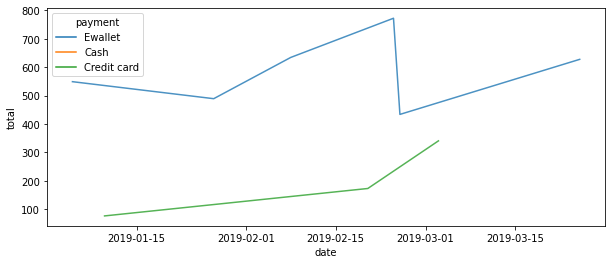

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot(data = temp.reset_index(), x = temp.reset_index().date, y = 'total', hue = 'payment', alpha = 0.8 , ci= True);

C:\Users\nicol\AppData\Local\Temp\ipykernel_6712\2841560336.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = df.reset_index(), x = df.reset_index().date, y = 'total', hue = 'payment', ci = False, marker = '.', markersize  = 20, markerfacecolor ='black');


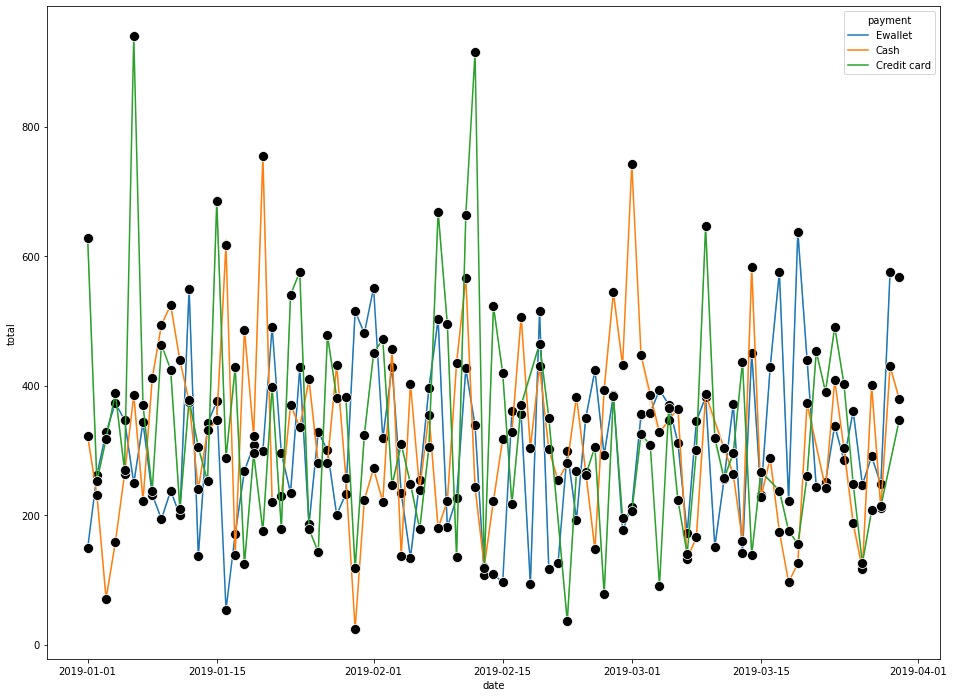

In [ ]:
plt.figure(figsize = (16,12))
sns.lineplot(data = df.reset_index(), x = df.reset_index().date, y = 'total', hue = 'payment', ci = False, marker = '.', markersize  = 20, markerfacecolor ='black');

#### como no se deben ver

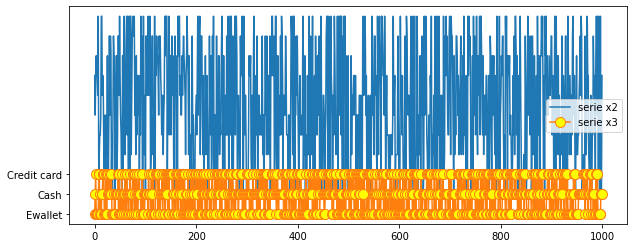

In [ ]:
f, ax = plt.subplots() #mala representacion
ax.plot(df.quantity, label = 'serie x2')
ax.plot(df.payment, marker = '.', markersize  = 20, markerfacecolor ='yellow', label = 'serie x3')
ax.legend();

In [ ]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5_percent', 'total',
       'date', 'time', 'payment', 'cogs', 'gross_margin_percentage',
       'gross_income', 'rating', 'tax_19_percent'],
      dtype='object')

In [ ]:
df.date.nunique()

89

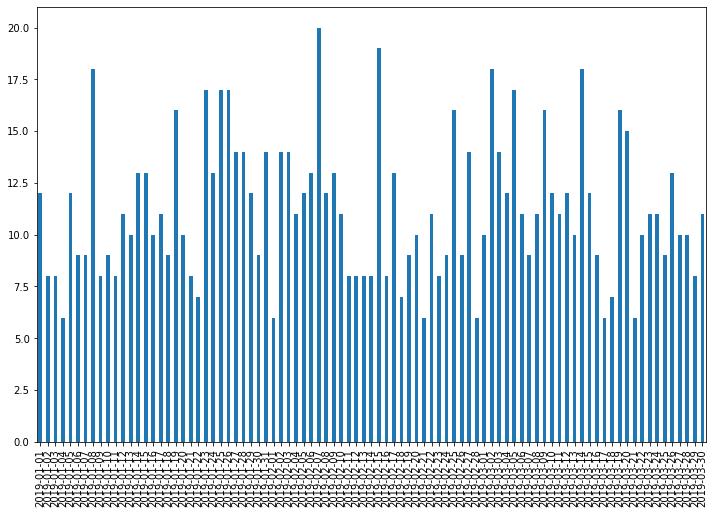

In [ ]:
df.date.dt.date.value_counts().sort_index().plot.bar(figsize = (12,8));  #line barh hist etc...

In [ ]:
#DOWNSAMPLING
pd.Series(temp.index.unique().sort_values()).head(10) #visualizamos lo que tenemos

0   2019-01-05
1   2019-01-10
2   2019-01-27
3   2019-02-08
4   2019-02-20
5   2019-02-24
6   2019-02-25
7   2019-03-03
8   2019-03-08
9   2019-03-25
Name: date, dtype: datetime64[ns]

In [ ]:
temp.resample('D')[['total']].sum().head(10)  #Crea dia intermedios entre [2019-01-05 - 2019-01-10]

,total
date,
2019-01-05,548.97
2019-01-06,0.00
2019-01-07,0.00
2019-01-08,0.00
2019-01-09,0.00
2019-01-10,76.15
2019-01-11,0.00
2019-01-12,0.00
2019-01-13,0.00


In [ ]:
'''Podemos aplicar la función de agregación a todo el dataframe, 
aunque solo lo va a hacer sobre las variables en las que tenga sentido.'''
temp.resample('D').sum().head(10)

C:\Users\nicol\AppData\Local\Temp\ipykernel_6712\4183711429.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp.resample('D').sum().head(10)


,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,gross_margin_percentage
date,,,,,,,,,
2019-01-05,548.97,74.69,7,26.14,99.34,522.83,26.14,9.10,4.76
2019-01-06,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
2019-01-07,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
2019-01-08,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
2019-01-09,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
2019-01-10,76.15,36.26,2,3.63,13.78,72.52,3.63,7.20,4.76
2019-01-11,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
2019-01-12,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
2019-01-13,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
# podemos usar .agg()
temp.resample('D').agg({'total':'sum','product_line':sp.stats.mode})

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\groupby\groupby.py:1651: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


,total,product_line
date,,
2019-01-05,548.97,"([Health and beauty], [1])"
2019-01-06,0.00,"([], [])"
2019-01-07,0.00,"([], [])"
...,...,...
2019-03-23,0.00,"([], [])"
2019-03-24,0.00,"([], [])"
2019-03-25,627.62,"([Electronic accessories], [1])"


In [ ]:
temp.loc['2019-01-05':].resample('D').sum().head(4) #y ahora puedo indexar mas facil

C:\Users\nicol\AppData\Local\Temp\ipykernel_6712\2809162930.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp.loc['2019-01-05':].resample('D').sum().head(4) #y ahora puedo indexar mas facil


,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,gross_margin_percentage
date,,,,,,,,,
2019-01-05,548.97,74.69,7,26.14,99.34,522.83,26.14,9.10,4.76
2019-01-06,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
2019-01-07,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00
2019-01-08,0.00,0.00,0,0.00,0.00,0.00,0.00,0.00,0.00


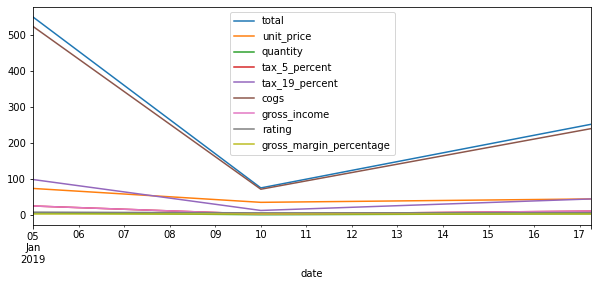

In [ ]:
# UPSAMPLING AVANZADO
temp.resample('6h').interpolate(method = 'linear').head(50).plot();

In [ ]:
#viernes de cada semana
temp.loc['2019-03-23':].resample('W-FRI').size() # incluso le puedo pedir dias en especifico obvio con mas datos se ve la potencia
'''https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets'''

C:\Users\nicol\AppData\Local\Temp\ipykernel_6712\1034958383.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  temp.loc['2019-03-23':].resample('W-FRI').size() # incluso le puedo pedir dias en especifico obvio con mas datos se ve la potencia


date
2019-03-29    1
Freq: W-FRI, dtype: int64

## VENTANAS MÓVILES

### VENTANAS MÓVILES NO PONDERADAs

In [ ]:
df3 = df.copy()

In [ ]:
df3.date

0     2019-01-05
1     2019-03-08
2     2019-03-03
         ...    
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: date, Length: 1000, dtype: datetime64[ns]

In [ ]:
df3.set_index('date', inplace = True)

In [ ]:
df3.head(2)

,invoice_id,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,city,gender,customer_type,branch,product_line,payment,gross_margin_percentage,time
date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,548.97,74.69,7,26.14,99.34,522.83,26.14,9.10,Yangon,Female,Member,A,Health and beauty,Ewallet,4.76,13:08
2019-03-08,226-31-3081,80.22,15.28,5,3.82,14.52,76.40,3.82,9.60,Naypyitaw,Female,Normal,C,Electronic accessories,Cash,4.76,10:29


In [ ]:
## **VENTANAS MÓVILES**
agregado_dia = df3.sort_index().loc['2019-01-01':].resample('D',kind = 'period').sum()
agregado_dia.head(10)

C:\Users\nicol\AppData\Local\Temp\ipykernel_6712\801513066.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agregado_dia = df3.sort_index().loc['2019-01-01':].resample('D',kind = 'period').sum()


,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,gross_margin_percentage
date,,,,,,,,,
2019-01-01,4745.18,659.95,81,225.96,858.65,4519.22,225.96,79.00,57.14
2019-01-02,1945.50,357.08,48,92.64,352.04,1852.86,92.64,48.40,38.10
2019-01-03,2078.13,475.66,37,98.96,376.04,1979.17,98.96,64.90,38.10
2019-01-04,1623.69,310.46,32,77.32,293.81,1546.37,77.32,39.10,28.57
2019-01-05,3536.68,739.64,55,168.41,639.97,3368.27,168.41,89.20,57.14
2019-01-06,3614.20,536.16,52,172.10,654.00,3442.10,172.10,73.60,42.86
2019-01-07,2834.24,512.09,53,134.96,512.86,2699.28,134.96,68.70,42.86
2019-01-08,5293.73,878.27,95,252.08,957.91,5041.65,252.08,121.50,85.71
2019-01-09,3021.34,378.26,58,143.87,546.72,2877.47,143.87,49.10,38.10


In [ ]:
#suma móvil de 3 días
agregado_dia.rolling(3).sum().head(8)

,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,gross_margin_percentage
date,,,,,,,,,
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,8768.81,1492.69,166.00,417.56,1586.74,8351.25,417.56,192.30,133.33
2019-01-04,5647.32,1143.20,117.00,268.92,1021.90,5378.40,268.92,152.40,104.76
2019-01-05,7238.50,1525.76,124.00,344.69,1309.82,6893.81,344.69,193.20,123.81
2019-01-06,8774.58,1586.26,139.00,417.84,1587.78,8356.74,417.84,201.90,128.57
2019-01-07,9985.13,1787.89,160.00,475.48,1806.83,9509.65,475.48,231.50,142.86
2019-01-08,11742.18,1926.52,200.00,559.15,2124.78,11183.03,559.15,263.80,171.43


In [ ]:
#media movil Diaria ---por que no podemos por mes por falta de datos  .rolling('M')
agregado_dia.rolling('D').mean()

,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,gross_margin_percentage
date,,,,,,,,,
2019-01-01,4745.18,659.95,81.00,225.96,858.65,4519.22,225.96,79.00,57.14
2019-01-02,1945.50,357.08,48.00,92.64,352.04,1852.86,92.64,48.40,38.10
2019-01-03,2078.13,475.66,37.00,98.96,376.04,1979.17,98.96,64.90,38.10
...,...,...,...,...,...,...,...,...,...
2019-03-28,2229.40,455.25,48.00,106.16,403.42,2123.24,106.16,70.50,47.62
2019-03-29,4023.24,530.77,54.00,191.58,728.02,3831.66,191.58,55.40,38.10
2019-03-30,4487.06,741.49,67.00,213.67,811.94,4273.39,213.67,74.80,52.38


In [ ]:
#media movil diaria = 1  // mensual = 30 
agregado_dia.rolling(1).mean().head(40)

,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,gross_margin_percentage
date,,,,,,,,,
2019-01-01,4745.18,659.95,81.00,225.96,858.65,4519.22,225.96,79.00,57.14
2019-01-02,1945.50,357.08,48.00,92.64,352.04,1852.86,92.64,48.40,38.10
2019-01-03,2078.13,475.66,37.00,98.96,376.04,1979.17,98.96,64.90,38.10
2019-01-04,1623.69,310.46,32.00,77.32,293.81,1546.37,77.32,39.10,28.57
2019-01-05,3536.68,739.64,55.00,168.41,639.97,3368.27,168.41,89.20,57.14
2019-01-06,3614.20,536.16,52.00,172.10,654.00,3442.10,172.10,73.60,42.86
2019-01-07,2834.24,512.09,53.00,134.96,512.86,2699.28,134.96,68.70,42.86
2019-01-08,5293.73,878.27,95.00,252.08,957.91,5041.65,252.08,121.50,85.71
2019-01-09,3021.34,378.26,58.00,143.87,546.72,2877.47,143.87,49.10,38.10


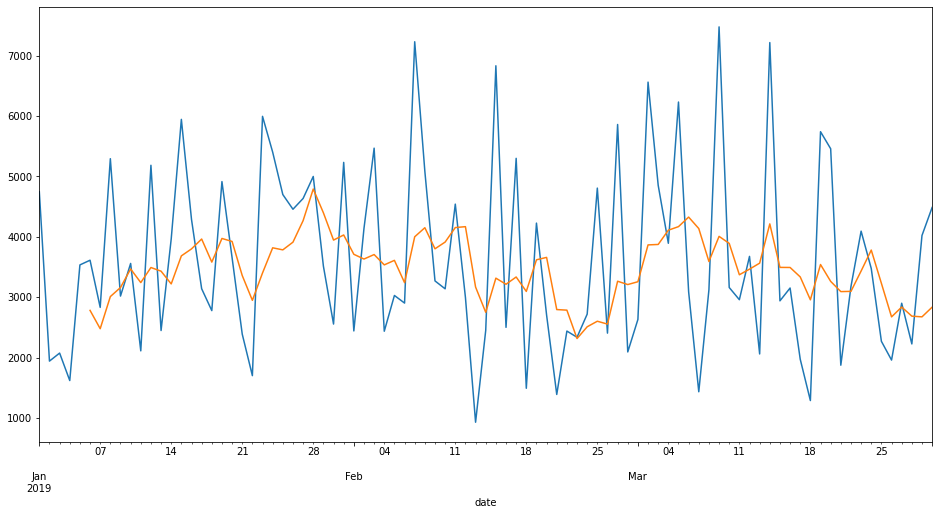

In [ ]:
#Vamos a ver cómo hacer ventanas móviles suaviza la curva.
agregado_dia['total'].plot(figsize = (16,8))
agregado_dia['cogs'].rolling(6).mean().plot(figsize = (16,8));   #lo ideal es hacerlo por mes cambia el numero de rolling()

# Ordenando las variables

In [ ]:
orden = ['date','invoice_id','total','unit_price','quantity', 'tax_5_percent','tax_19_percent','cogs','gross_income','rating','city','gender','customer_type','branch','product_line','payment','gross_margin_percentage','time']

In [ ]:
df = df[orden]
df

,date,invoice_id,total,unit_price,quantity,tax_5_percent,tax_19_percent,cogs,gross_income,rating,city,gender,customer_type,branch,product_line,payment,gross_margin_percentage,time
0,2019-01-05,750-67-8428,548.97,74.69,7,26.14,99.34,522.83,26.14,9.10,Yangon,Female,Member,A,Health and beauty,Ewallet,4.76,13:08
1,2019-03-08,226-31-3081,80.22,15.28,5,3.82,14.52,76.40,3.82,9.60,Naypyitaw,Female,Normal,C,Electronic accessories,Cash,4.76,10:29
2,2019-03-03,631-41-3108,340.53,46.33,7,16.22,61.62,324.31,16.22,7.40,Yangon,Male,Normal,A,Home and lifestyle,Credit card,4.76,13:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2019-02-09,727-02-1313,33.43,31.84,1,1.59,6.05,31.84,1.59,7.70,Yangon,Male,Member,A,Food and beverages,Cash,4.76,13:22
998,2019-02-22,347-56-2442,69.11,65.82,1,3.29,12.51,65.82,3.29,4.10,Yangon,Male,Normal,A,Home and lifestyle,Cash,4.76,15:33
999,2019-02-18,849-09-3807,649.30,88.34,7,30.92,117.49,618.38,30.92,6.60,Yangon,Female,Member,A,Fashion accessories,Cash,4.76,13:28


In [ ]:
df.sort_index(axis = 1) # Tambien podemos ordenar por orden alfabetico

,branch,city,cogs,customer_type,date,gender,gross_income,gross_margin_percentage,invoice_id,payment,product_line,quantity,rating,tax_19_percent,tax_5_percent,time,total,unit_price
0,A,Yangon,522.83,Member,2019-01-05,Female,26.14,4.76,750-67-8428,Ewallet,Health and beauty,7,9.10,99.34,26.14,13:08,548.97,74.69
1,C,Naypyitaw,76.40,Normal,2019-03-08,Female,3.82,4.76,226-31-3081,Cash,Electronic accessories,5,9.60,14.52,3.82,10:29,80.22,15.28
2,A,Yangon,324.31,Normal,2019-03-03,Male,16.22,4.76,631-41-3108,Credit card,Home and lifestyle,7,7.40,61.62,16.22,13:23,340.53,46.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,A,Yangon,31.84,Member,2019-02-09,Male,1.59,4.76,727-02-1313,Cash,Food and beverages,1,7.70,6.05,1.59,13:22,33.43,31.84
998,A,Yangon,65.82,Normal,2019-02-22,Male,3.29,4.76,347-56-2442,Cash,Home and lifestyle,1,4.10,12.51,3.29,15:33,69.11,65.82
999,A,Yangon,618.38,Member,2019-02-18,Female,30.92,4.76,849-09-3807,Cash,Fashion accessories,7,6.60,117.49,30.92,13:28,649.30,88.34


In [ ]:
'''df.reindex(columns = lista_con_nombres_ordenados)
df.reindex(columns = lista_con_nombres_ordenados)'''

'df.reindex(columns = lista_con_nombres_ordenados)\ndf.reindex(columns = lista_con_nombres_ordenados)'

### Analisis por metodo Describe()

In [ ]:
df.describe().T  #.plot.line(figsize =(19,5))

,count,mean,std,min,25%,50%,75%,max
total,1000.00,322.97,245.89,10.68,124.42,253.85,471.35,1042.65
unit_price,1000.00,55.67,26.49,10.08,32.88,55.23,77.94,99.96
quantity,1000.00,5.51,2.92,1.00,3.00,5.00,8.00,10.00
tax_5_percent,1000.00,15.38,11.71,0.51,5.92,12.09,22.45,49.65
tax_19_percent,1000.00,58.44,44.49,1.93,22.51,45.93,85.29,188.67
cogs,1000.00,307.59,234.18,10.17,118.50,241.76,448.91,993.00
gross_income,1000.00,15.38,11.71,0.51,5.92,12.09,22.45,49.65
rating,1000.00,6.97,1.72,4.00,5.50,7.00,8.50,10.00
gross_margin_percentage,1000.00,4.76,0.00,4.76,4.76,4.76,4.76,4.76


C:\Users\nicol\AppData\Local\Temp\ipykernel_6712\1355670713.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'Reds');


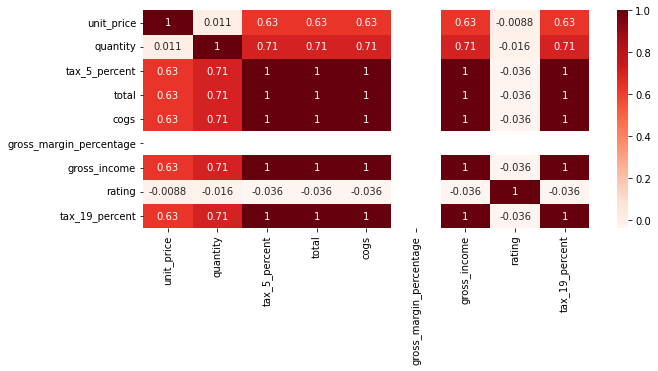

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap = 'Reds');
#https://www.youtube.com/watch?v=9G4HPNVA5w4

In [ ]:
df.corr()

C:\Users\nicol\AppData\Local\Temp\ipykernel_6712\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,unit_price,quantity,tax_5_percent,total,cogs,gross_margin_percentage,gross_income,rating,tax_19_percent
unit_price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01,0.63
quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02,0.71
tax_5_percent,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,1.00
total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,1.00
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,1.00
gross_margin_percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,1.00
rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00,-0.04
tax_19_percent,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04,1.00


# Graficacion basica por densidad

<AxesSubplot:ylabel='Density'>

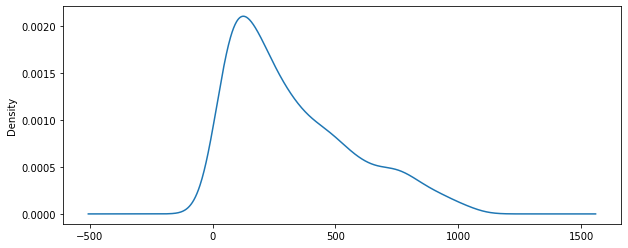

In [ ]:
df.total.plot.kde()

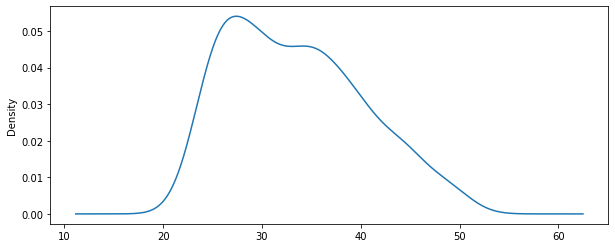

In [ ]:
df[df.total > 500.00].tax_5_percent.plot.density();

In [ ]:
df[df.total < 500.00].describe().T

,count,mean,std,min,25%,50%,75%,max
unit_price,773.00,48.27,24.75,10.08,26.61,45.58,67.10,99.89
quantity,773.00,4.67,2.71,1.00,2.00,4.00,7.00,10.00
tax_5_percent,773.00,10.07,6.28,0.51,4.57,8.95,14.76,23.80
total,773.00,211.40,131.94,10.68,95.86,187.87,310.04,499.73
cogs,773.00,201.33,125.66,10.17,91.30,178.92,295.28,475.93
gross_margin_percentage,773.00,4.76,0.00,4.76,4.76,4.76,4.76,4.76
gross_income,773.00,10.07,6.28,0.51,4.57,8.95,14.76,23.80
rating,773.00,7.01,1.68,4.00,5.60,7.00,8.40,10.00
tax_19_percent,773.00,38.25,23.87,1.93,17.35,33.99,56.10,90.43


In [ ]:
df[df.total < 500.00].tax_5_percent.describe().T


count            773.00
mean              10.07
std                6.28
min                0.51
25%                4.57
50%                8.95
75%               14.76
max               23.80
Name: tax_5_percent, dtype: float64

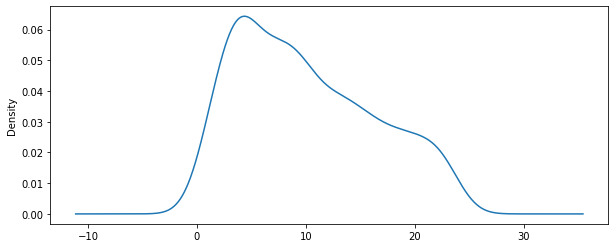

In [ ]:
df[df.total < 500.00].tax_5_percent.plot.density();

In [ ]:
df.unit_price.describe()#.plot.bar(figsize = (10,4), color = 'red');

count    1000.000000
mean       55.672130
std        26.494628
min        10.080000
25%        32.875000
50%        55.230000
75%        77.935000
max        99.960000
Name: unit_price, dtype: float64

# Graficacion general para contextualizar 

In [ ]:
# aunque es un mal grafico podemos traer variables categoricas a numericas
df.gender

0      Female
1      Female
2        Male
        ...  
997      Male
998      Male
999    Female
Name: gender, Length: 1000, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5_percent            1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

In [ ]:
#Seria mas interesante si tuvieramos las edades
df.gender.value_counts()

Female    501
Male      499
Name: gender, dtype: int64

'Si una curva de densidad está sesgada a la derecha , entonces la media es mayor que la mediana.\nSi una curva de densidad no tiene sesgo , entonces la media es igual a la mediana.'

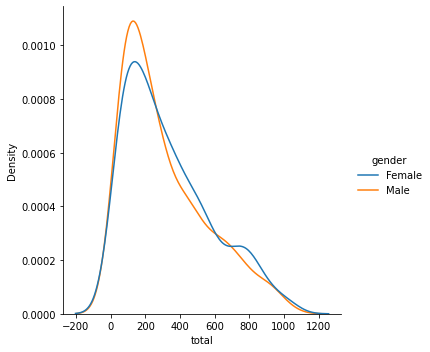

In [ ]:
# Analiss de densidad aplicado a la variable total como independiente
sns.displot(data = df, x = 'total',
           kind = 'kde', hue = 'gender');

# Mas adelante haremos una prueba de [Chi cuadrado] para definir nuestra hipotesis y un Pvalor
#para el std o Intervalos de Confianza
'''Si una curva de densidad está sesgada a la derecha , entonces la media es mayor que la mediana.
Si una curva de densidad no tiene sesgo , entonces la media es igual a la mediana.'''

In [ ]:
# Mediana
statistics.median(df.total)


253.848

In [ ]:
# Media
statistics.mean(df.total)

322.966749

In [ ]:
from scipy.stats import trim_mean
# Media Truncada quitando atipicos
trim_mean(df["total"], 0.2)

275.0811

In [ ]:
#Media ponderada
(df["total"] * df["quantity"]).sum() / df["quantity"].sum()

414.9148137931034

In [ ]:
#desviacion tipica
df["total"].std()

245.88533510097187

In [ ]:
# La varianza
df["total"].var(ddof=0)

60399.138419699506

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5_percent            1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

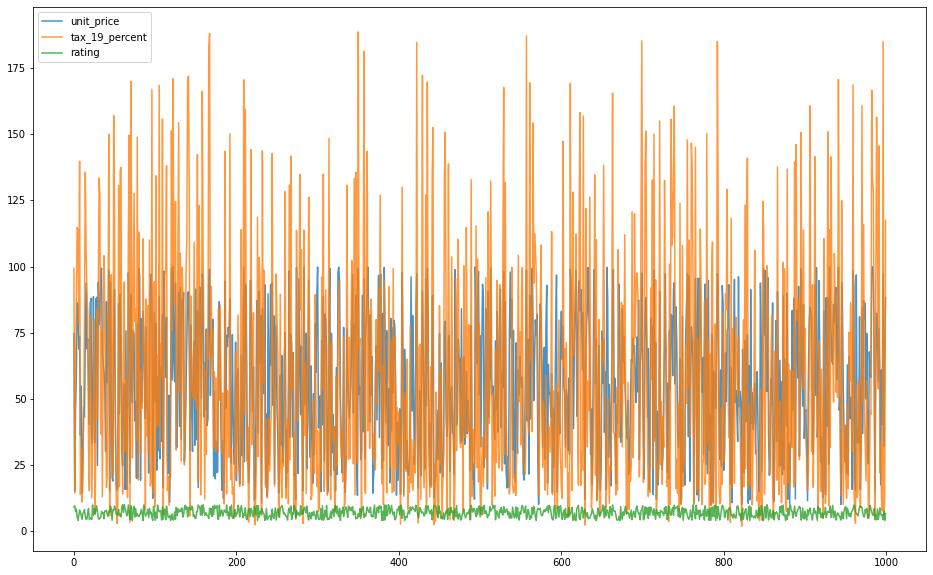

In [ ]:
df[['payment','unit_price','tax_19_percent','rating']].plot(figsize = (16,10), alpha = 0.8); #poco efectivo pero puede servir

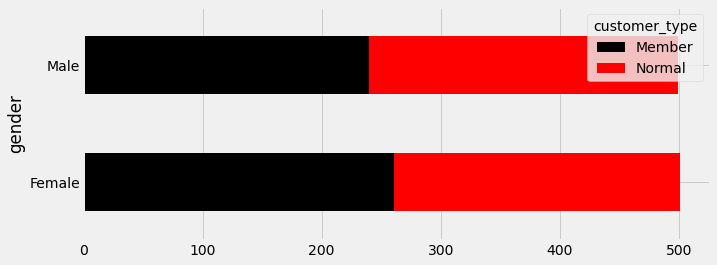

In [ ]:
plt.style.use('fivethirtyeight')
table_Gender = pd.crosstab(df.gender, df.customer_type)
table_Gender.plot.barh(stacked=True, color=['black','red']);  #Sera mucho mejor con variable de analsis

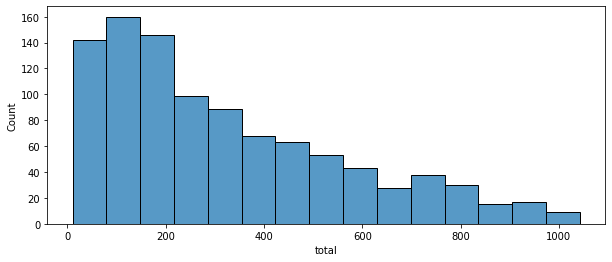

In [ ]:
sns.histplot(data = df, x = 'total');

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


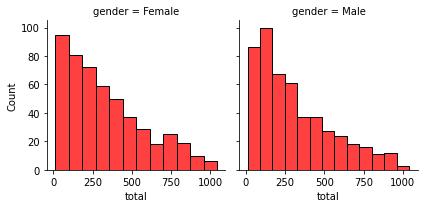

In [ ]:
f = sns.FacetGrid(df, col = 'gender');
f.map(sns.histplot, 'total',color = 'red');

#las mujeres tienen un poco mas de ingresos ...?

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFounda

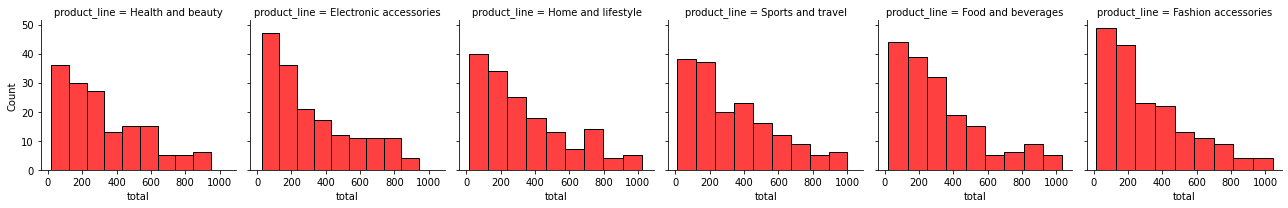

In [ ]:
f = sns.FacetGrid(df, col = 'product_line');
f.map(sns.histplot, 'total',color = 'red');

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


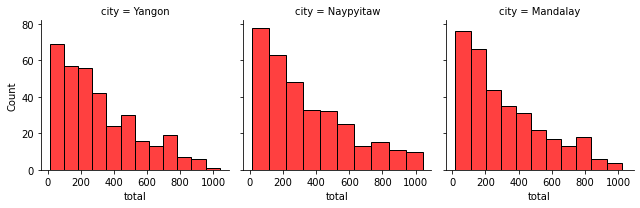

In [ ]:
f = sns.FacetGrid(df, col = 'city');
f.map(sns.histplot, 'total',color = 'red');

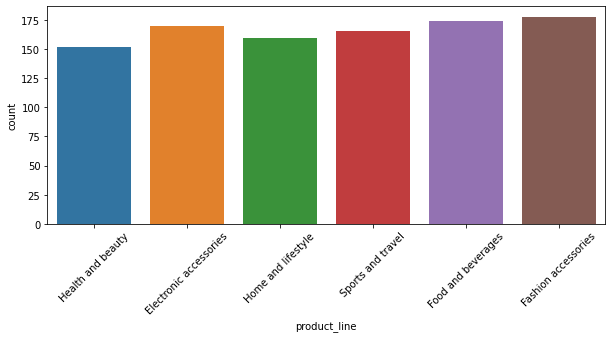

In [ ]:
g = sns.countplot(data = df, x = 'product_line')
g.tick_params(axis='x', labelsize=10, labelrotation=45)

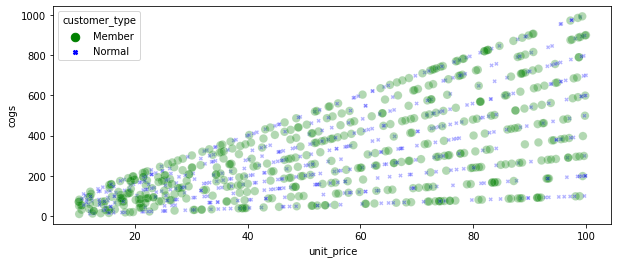

In [ ]:
sns.scatterplot(data = df, x = 'unit_price', y = 'cogs',
                hue = 'customer_type',
                size = 'customer_type', style = 'customer_type',
                alpha = 0.3,
                legend = 'full',
                palette = ['green','blue']
                ); #tax_5_porcent #

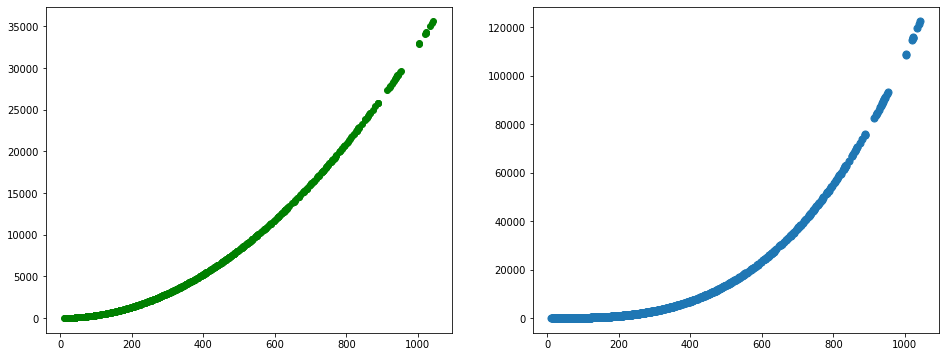

In [ ]:
f, ax = plt.subplots(1,2, figsize = (16,6))
ax[0].scatter(x = df.total, y = df.tax_19_percent ** 2, color = 'green')
ax[1].scatter(x = df.total, y = df.tax_5_percent ** 3, s = 50);

#tambien nos confirma que nuestra formala es correcta

In [ ]:
sns.reset_defaults()

<Figure size 1000x600 with 0 Axes>

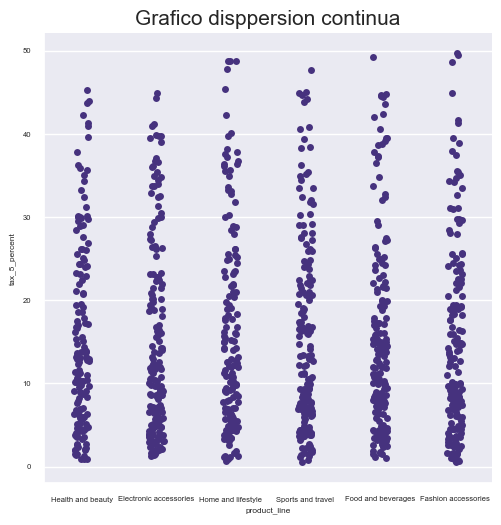

In [ ]:
#ingresos brutos de acuerdo al genero
plt.figure(figsize = (10,6))
d = sns.set(font_scale=0.5, palette= "viridis",)
d = sns.catplot(data=df, x="product_line", y="tax_5_percent",)  #order=["Member", "Normal"]
d = plt.title('Grafico disppersion continua', fontsize = 15)

In [ ]:
sns.reset_defaults()

#### Segun esos datos que son "Atipicos" podemos eliminarlos o potenciarlos

C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3540: UserWarning: 5.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3540: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\nicol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\categorical.py:3540: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


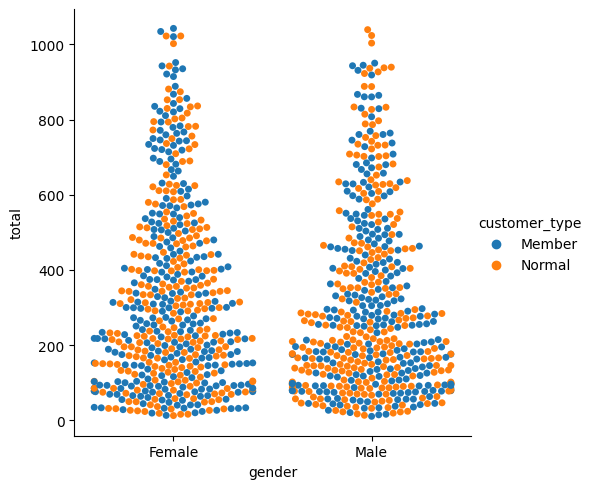

In [ ]:
sns.catplot(data=df, x="gender", y="total", hue="customer_type", kind="swarm");

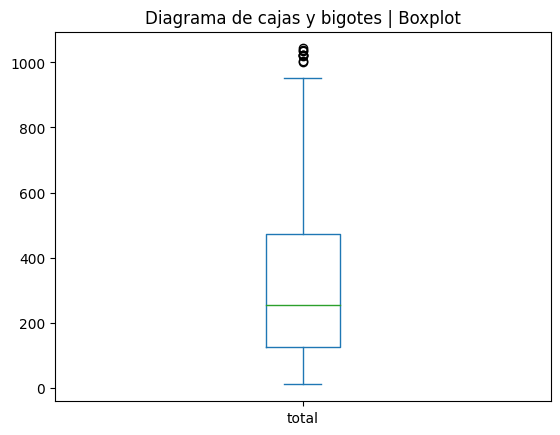

In [ ]:
df.total.plot.box(title = 'Diagrama de cajas y bigotes | Boxplot');


In [ ]:
DatosAtipicos = (df['total'] > 1000) & (df['total'] <= 2000)
df.loc[DatosAtipicos].value_counts().sum()

9

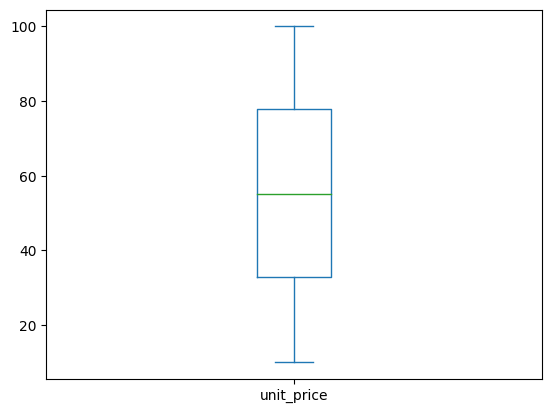

In [ ]:
df.unit_price.plot.box();

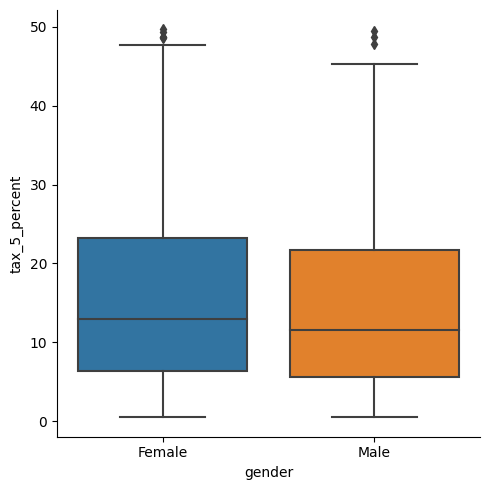

In [ ]:
sns.catplot(data=df, x="gender", y="tax_5_percent", kind="box"); #pero essto lo solucionaremos en la parte de analisis de negocio 

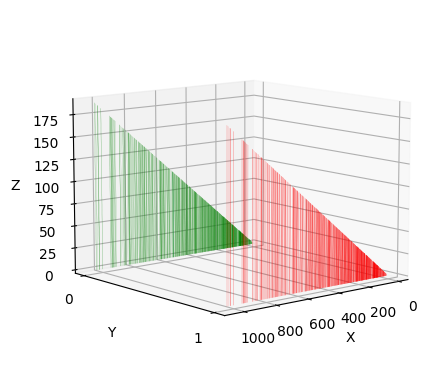

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [ 1, 0]
for c, k in zip(colors, yticks):
    cs = [c] * len(df)
    cs[0] = 'c'

    ax.bar(df.total, df.tax_19_percent, zs=k, zdir='y', color=cs, alpha=0.8)
    ax.view_init(elev=10., azim=50)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

# Tablas cruzadas para Ch2

In [ ]:
tabla2 = pd.crosstab(df.total, df.gender, margins = True,normalize = 'all')
tabla2

gender,Female,Male,All
total,,,
10.6785,0.00,0.00,0.00
12.6945,0.00,0.00,0.00
13.167,0.00,0.00,0.00
...,...,...,...
1039.29,0.00,0.00,0.00
1042.65,0.00,0.00,0.00
All,0.50,0.50,1.00


    SI hay relación    |   NO hay relación                   

  0.0 —————- 0.5 ——————-1.0

In [ ]:
import scipy as sp
chi, pvalor, gl, experado = sp.stats.chi2_contingency(tabla2)

if pvalor <= 0.5:
    print(f'pvalor: {pvalor:5.2f}    SI hay relación    ')
else: 
    print('  NO hay relación   ')
print('-'*20)
print(f'chi2 = {chi}')
print(f'pvalor = {pvalor:10.2f}')
print(f'gl = {gl}')
print('-'*20)
print(f'expereado = {experado}')

  NO hay relación   
--------------------
chi2 = 0.9939999759999041
pvalor =       1.00
gl = 1980
--------------------
expereado = [[5.01e-04 4.99e-04 1.00e-03]
 [5.01e-04 4.99e-04 1.00e-03]
 [5.01e-04 4.99e-04 1.00e-03]
 ...
 [5.01e-04 4.99e-04 1.00e-03]
 [5.01e-04 4.99e-04 1.00e-03]
 [5.01e-01 4.99e-01 1.00e+00]]


In [ ]:
df['total'].mean()

322.966749

# Grupos de analisis Graficos y tablas

<AxesSubplot:xlabel='product_line'>

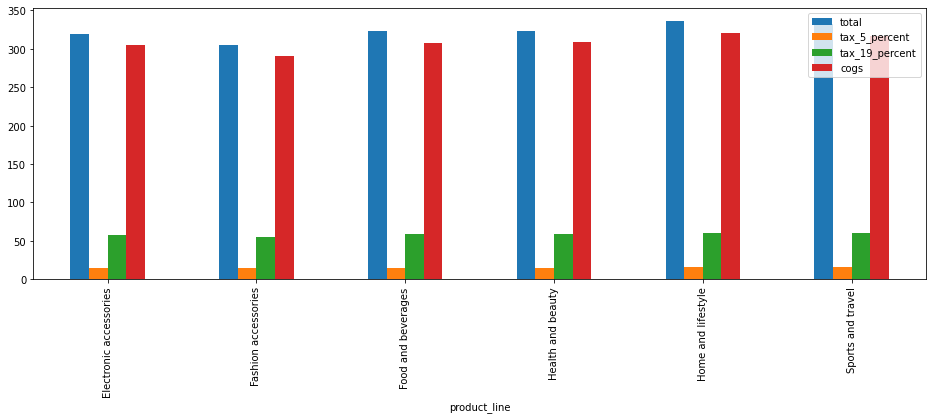

In [ ]:
df.groupby('product_line').agg({'total':np.mean,'tax_5_percent':np.mean,'tax_19_percent':np.mean, 'cogs':np.mean}).plot.bar(figsize = (16,5)) #recalculo

In [ ]:
df_Copy.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5_percent', 'total',
       'date', 'time', 'payment', 'cogs', 'gross_margin_percentage',
       'gross_income', 'rating', 'tax_19_percent'],
      dtype='object')

In [ ]:
#muchas veces para no afectar nuestro dataset debemos hacer copias
df_Copy = df.copy()
# Creamos una variable date para poder agregar por ella.
df['time'] = df_Copy.date.dt.date

In [ ]:
df_Copy = df_Copy.groupby(['gender','date','invoice_id']).agg({'total':sum,
                                                              'unit_price':sum,
                                                              'quantity':sum,
                                                              'tax_5_percent':max,
                                                              'tax_19_percent':max}).reset_index()
df_Copy

,gender,date,invoice_id,total,unit_price,quantity,tax_5_percent,tax_19_percent
0,Female,2019-01-01,182-52-7000,113.57,27.04,4.00,5.41,20.55
1,Female,2019-01-01,271-77-8740,184.09,29.22,6.00,8.77,33.31
2,Female,2019-01-01,416-17-9926,779.31,74.22,10.00,37.11,141.02
...,...,...,...,...,...,...,...,...
997,Male,2019-03-30,731-59-7531,609.59,72.57,8.00,29.03,110.31
998,Male,2019-03-30,743-04-1105,918.73,97.22,9.00,43.75,166.25
999,Male,2019-03-30,778-89-7974,442.32,70.21,6.00,21.06,80.04


In [ ]:
df_Copy = df_Copy.sort_values(['gender','invoice_id','date'])
df_Copy.head()

AttributeError: 'Styler' object has no attribute 'sort_values'

#### Seria mas interesante si tuvieramos mas ventas de los dias y calcularamos los acumulados y promedios con 'LAGS'

In [ ]:
# Por ejemplo si nos pidieran ver una factura o grupo, ya tendriamos mejores resultados y graficarlas
df_Copy[df_Copy.invoice_id == '182-52-7000'].head(50) #.plot.bar()  Dejamos el head por si son muchas 

,gender,date,invoice_id,total,unit_price,quantity,tax_5_percent,tax_19_percent
0,Female,2019-01-01,182-52-7000,113.57,27.04,4.00,5.41,20.55


In [ ]:
#metodo apply
df_Copy['Indicador2'] = df['total'].apply(lambda x: 1 if x < 250 else 0)
df_Copy

#Bueno para efectos de machine learning

,gender,date,invoice_id,total,unit_price,quantity,tax_5_percent,tax_19_percent,Indicador2
89,Female,2019-01-17,101-81-4070,131.92,62.82,2.00,6.28,23.87,0
30,Female,2019-01-07,109-28-2512,614.94,97.61,6.00,29.28,111.28,0
259,Female,2019-02-14,109-86-4363,441.59,60.08,7.00,21.03,79.91,0
...,...,...,...,...,...,...,...,...,...
847,Male,2019-03-05,895-66-0685,56.95,18.08,3.00,2.71,10.31,1
642,Male,2019-01-26,896-34-0956,22.39,21.32,1.00,1.07,4.05,1
937,Male,2019-03-19,898-04-2717,721.98,76.40,9.00,34.38,130.64,0


In [ ]:
df_Copy.loc[df_Copy['Indicador2'] == 0]

,gender,date,invoice_id,total,unit_price,quantity,tax_5_percent,tax_19_percent,Indicador2
89,Female,2019-01-17,101-81-4070,131.92,62.82,2.00,6.28,23.87,0
30,Female,2019-01-07,109-28-2512,614.94,97.61,6.00,29.28,111.28,0
259,Female,2019-02-14,109-86-4363,441.59,60.08,7.00,21.03,79.91,0
...,...,...,...,...,...,...,...,...,...
740,Male,2019-02-12,885-56-0389,54.97,52.35,1.00,2.62,9.95,0
634,Male,2019-01-25,888-02-0338,247.87,26.23,9.00,11.80,44.85,0
937,Male,2019-03-19,898-04-2717,721.98,76.40,9.00,34.38,130.64,0


In [ ]:
df_Copy[(df_Copy['quantity'] > 8) & (df_Copy.Indicador2 == 0)]

,gender,date,invoice_id,total,unit_price,quantity,tax_5_percent,tax_19_percent,Indicador2
421,Female,2019-03-14,122-61-9553,484.97,51.32,9.00,23.09,87.76,0
31,Female,2019-01-07,126-54-1082,203.55,21.54,9.00,9.69,36.83,0
422,Female,2019-03-14,139-32-4183,921.19,97.48,9.00,43.87,166.69,0
...,...,...,...,...,...,...,...,...,...
898,Male,2019-03-13,877-22-3308,166.63,15.87,10.00,7.93,30.15,0
634,Male,2019-01-25,888-02-0338,247.87,26.23,9.00,11.80,44.85,0
937,Male,2019-03-19,898-04-2717,721.98,76.40,9.00,34.38,130.64,0


In [ ]:
#Lista de condiciones
condiciones = [(df_Copy['total'] <= 200),
               (df_Copy['unit_price'] > 20) & (df['unit_price'] <= 30),
               (df_Copy['tax_5_percent'] < 20)]

#Lista de resultados
resultados = ['01_Menor_o_igual_500','02_Entre_20_y_30','03_Menor_que_20']
                
#Aplicamos select
df['Discretizada'] = np.select(condiciones,resultados, default = -999)

In [ ]:
df.Discretizada.value_counts()

01_Menor_o_igual_500    410
03_Mmenor_que_20        240
-999                    236
02_Entre_20_y_30        114
Name: Discretizada, dtype: int64

In [ ]:
df[['Discretizada']] 

,Discretizada
0,01_Menor_o_igual_500
1,02_Entre_20_y_30
2,-999
...,...
997,01_Menor_o_igual_500
998,01_Menor_o_igual_500
999,-999


In [ ]:
df.groupby('city')[['unit_price','tax_19_percent']].agg('count')

,unit_price,tax_19_percent
city,,
Mandalay,332,332
Naypyitaw,328,328
Yangon,340,340


# indexacion

desde pandas existen 30 metodos, pero con consultas interactivas mas de 60

para mas info consultame a nicolasfajardodaza@gmail.com

In [ ]:
df['total']  #.max() min() sdt().....ETC

0      548.9715
1       80.2200
2      340.5255
         ...   
997     33.4320
998     69.1110
999    649.2990
Name: total, Length: 1000, dtype: float64

In [ ]:
llamado = df[['total','unit_price','gender','quantity']].max()
llamado

total         1042.65
unit_price      99.96
gender           Male
quantity           10
dtype: object

In [ ]:
df.loc[(df['total']) == 1042.65]

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_porcent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.3,10,49.65,1042.65,2/15/2019,14:53,Credit card,993.0,4.761905,49.65,6.6


In [ ]:
df.loc[:,df.columns.str.contains('g')]

,gender,cogs,gross_margin_percentage,gross_income,rating
0,Female,522.83,4.761905,26.1415,9.1
1,Female,76.40,4.761905,3.8200,9.6
2,Male,324.31,4.761905,16.2155,7.4
...,...,...,...,...,...
997,Male,31.84,4.761905,1.5920,7.7
998,Male,65.82,4.761905,3.2910,4.1
999,Female,618.38,4.761905,30.9190,6.6


In [ ]:
df['quantity'] # .value_counts()  .sum()  sort_values()

0      7
1      5
2      7
      ..
997    1
998    1
999    7
Name: quantity, Length: 1000, dtype: int64

In [ ]:
df.iloc[:,[1,5]]

,branch,product_line
0,A,Health and beauty
1,C,Electronic accessories
2,A,Home and lifestyle
...,...,...
997,A,Food and beverages
998,A,Home and lifestyle
999,A,Fashion accessories


In [ ]:
df.loc[20] # Fila

invoice_id                            300-71-4605
branch                                          C
city                                    Naypyitaw
customer_type                              Member
gender                                       Male
product_line               Electronic accessories
unit_price                                  86.04
quantity                                        5
tax_5_porcent                               21.51
total                                      451.71
date                                    2/25/2019
time                                        11:24
payment                                   Ewallet
cogs                                        430.2
gross_margin_percentage                  4.761905
gross_income                                21.51
rating                                        4.8
Name: 20, dtype: object

In [ ]:
re_sample  = df.loc[(df['total']) < 451.71]
re_sample

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_porcent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
re_sample =  re_sample.reset_index().set_index('date')

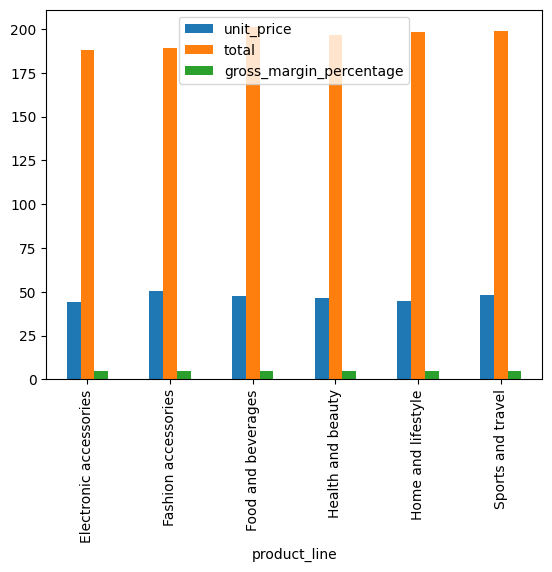

In [ ]:
temporal = re_sample.groupby('product_line').agg({'unit_price':np.mean,'total':np.mean,'gross_margin_percentage':np.mean }).plot.bar()
plt.xticks(rotation = 90);

In [ ]:
re_sample

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_porcent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df['m_b'] = (re_sample['total'] - re_sample['tax_5_porcent'] / re_sample['total']) / 100
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_porcent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,m_b
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,NaN
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,0.801724
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3.404779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,0.333844
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,0.690634
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,NaN


In [ ]:
dc_constante = re_sample[re_sample.unit_price == '68.84'].groupby(['product_line','quantity','date']).gross_margin_percentage.sum()
dc_constante

Series([], Name: gross_margin_percentage, dtype: float64)

In [ ]:
dc_constante.unstack(level = 1).plot(subplots = True, layout = (17,2), sharex=True, figsize=(20,30));
plt.xticks(rotation = 90);


TypeError: no numeric data to plot

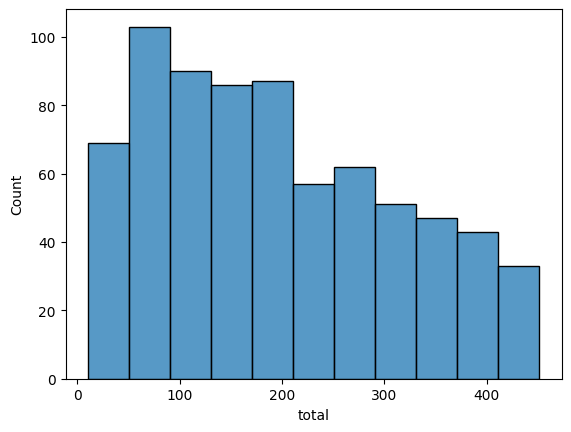

In [ ]:
sns.histplot(data = re_sample, x = 'total');

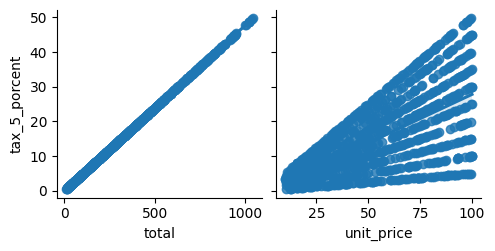

In [ ]:
sns.pairplot(df, x_vars = ['total','unit_price'], y_vars = 'tax_5_porcent', kind = 'reg');

<AxesSubplot:xlabel='tax_5_porcent', ylabel='unit_price'>

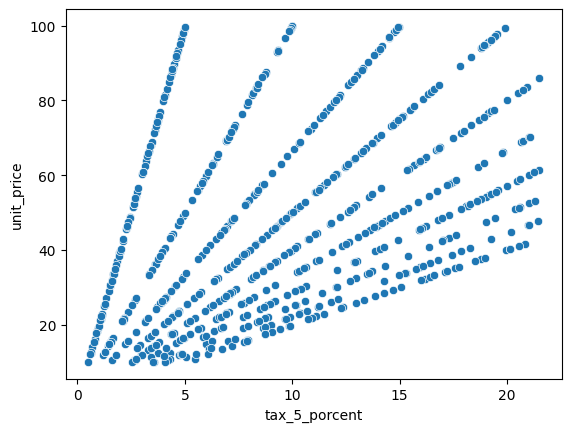

In [ ]:
sns.scatterplot(data = re_sample, x = 'tax_5_porcent', y = 'unit_price')

# Variables de análisis básicas
### Cálculos directos

In [ ]:
df.unit_price.sum()

55672.130000000005

In [ ]:
# Variables Aritmeticas directas...
(df['unit_price'] * df['quantity']) - df['tax_5_porcent'].sort_values(ascending = True)

#Segun el resultado...debemos agregarla como variable? 

0      496.6885
1       72.5800
2      308.0945
         ...   
997     30.2480
998     62.5290
999    587.4610
Length: 1000, dtype: float64

In [ ]:
74.69 * 7 - 26.14

496.68999999999994

In [ ]:
# El df siempre a la mano
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_porcent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2019-02-18,13:28,Cash,618.38,4.761905,30.9190,6.6


In [ ]:
df.loc[df['total'].between(10,15.50)].sort_values(by = 'total', ascending = True)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_porcent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
822,784-21-9238,C,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,2019-02-07,14:15,Cash,10.17,4.761905,0.5085,5.9
629,308-39-1707,A,Yangon,Normal,Female,Fashion accessories,12.09,1,0.6045,12.6945,2019-01-26,18:19,Credit card,12.09,4.761905,0.6045,8.2
223,279-62-1445,C,Naypyitaw,Member,Female,Fashion accessories,12.54,1,0.6270,13.1670,2019-02-21,12:38,Cash,12.54,4.761905,0.6270,8.2
443,192-98-7397,C,Naypyitaw,Normal,Male,Fashion accessories,12.78,1,0.6390,13.4190,2019-01-08,14:11,Ewallet,12.78,4.761905,0.6390,9.5
402,236-86-3015,C,Naypyitaw,Member,Male,Home and lifestyle,13.98,1,0.6990,14.6790,2019-02-04,13:38,Ewallet,13.98,4.761905,0.6990,9.8


In [ ]:
df.query('`total` > 1020 and `total` < 1035')

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_porcent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2019-02-08,13:00,Credit card,972.1,4.761905,48.605,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,2019-01-30,20:23,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,2019-01-12,16:18,Ewallet,975.0,4.761905,48.750,8.0
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,2019-01-15,13:48,Credit card,973.7,4.761905,48.685,4.9
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,2019-03-02,17:16,Ewallet,973.8,4.761905,48.690,4.4


# Analisis Variables de negocios 

### Vamos a responder las preguntas que al Duenio del negocio le interesan para generar nuevas estrategias en su beneficio 

In [ ]:
# Cual es el producto mas vendido entre las mujeres?

In [ ]:
# Cual es el producto mas vendido entre los hombres?

In [ ]:
# Producto en general mas vendido

In [ ]:
# Producto con mas impuestos

# Päretto

In [ ]:
df_ventas = df.groupby('tax_5_porcent')[['total']].sum()
df_ventas

,total
tax_5_porcent,
0.5085,10.6785
0.6045,12.6945
0.6270,13.1670
...,...
49.2600,1034.4600
49.4900,1039.2900
49.6500,1042.6500


In [ ]:
df_ventas.sort_values('total', ascending = False, inplace = True)
df_ventas

,total
tax_5_porcent,
39.4800,1658.1600
49.6500,1042.6500
49.4900,1039.2900
...,...
0.6270,13.1670
0.6045,12.6945
0.5085,10.6785


In [ ]:
df_ventas['Posicion'] = np.arange(start = 1, stop = len(df_ventas) + 1)
df_ventas

,total,Posicion
tax_5_porcent,,
39.4800,1658.1600,1
49.6500,1042.6500,2
49.4900,1039.2900,3
...,...,...
0.6270,13.1670,988
0.6045,12.6945,989
0.5085,10.6785,990


In [ ]:

df_ventas['Posicion_Porc'] = df_ventas.Posicion.transform(lambda x: x / df_ventas.shape[0] * 100)
df_ventas

,total,Posicion,Posicion_Porc
tax_5_porcent,,,
39.4800,1658.1600,1,0.10101
49.6500,1042.6500,2,0.20202
49.4900,1039.2900,3,0.30303
...,...,...,...
0.6270,13.1670,988,99.79798
0.6045,12.6945,989,99.89899
0.5085,10.6785,990,100.00000


In [ ]:
df_ventas['Acum'] = df_ventas['total'].cumsum()
df_ventas

,total,Posicion,Posicion_Porc,Acum
tax_5_porcent,,,,
39.4800,1658.1600,1,0.10101,1658.1600
49.6500,1042.6500,2,0.20202,2700.8100
49.4900,1039.2900,3,0.30303,3740.1000
...,...,...,...,...
0.6270,13.1670,988,99.79798,322943.3760
0.6045,12.6945,989,99.89899,322956.0705
0.5085,10.6785,990,100.00000,322966.7490


In [ ]:
df_ventas['Acum_Porc'] = df_ventas.Acum.transform(lambda x: x / max(df_ventas.Acum) * 100)
df_ventas

,total,Posicion,Posicion_Porc,Acum,Acum_Porc
tax_5_porcent,,,,,
39.4800,1658.1600,1,0.10101,1658.1600,0.513415
49.6500,1042.6500,2,0.20202,2700.8100,0.836250
49.4900,1039.2900,3,0.30303,3740.1000,1.158045
...,...,...,...,...,...
0.6270,13.1670,988,99.79798,322943.3760,99.992763
0.6045,12.6945,989,99.89899,322956.0705,99.996694
0.5085,10.6785,990,100.00000,322966.7490,100.000000


In [ ]:
df_ventas = df_ventas[['Posicion_Porc','Acum_Porc']]
df_ventas

,Posicion_Porc,Acum_Porc
tax_5_porcent,,
39.4800,0.10101,0.513415
49.6500,0.20202,0.836250
49.4900,0.30303,1.158045
...,...,...
0.6270,99.79798,99.992763
0.6045,99.89899,99.996694
0.5085,100.00000,100.000000


In [ ]:
df_ventas.Posicion_Porc.values

array([  0.1010101 ,   0.2020202 ,   0.3030303 ,   0.4040404 ,
         0.50505051,   0.60606061,   0.70707071,   0.80808081,
         0.90909091,   1.01010101,   1.11111111,   1.21212121,
         1.31313131,   1.41414141,   1.51515152,   1.61616162,
         1.71717172,   1.81818182,   1.91919192,   2.02020202,
         2.12121212,   2.22222222,   2.32323232,   2.42424242,
         2.52525253,   2.62626263,   2.72727273,   2.82828283,
         2.92929293,   3.03030303,   3.13131313,   3.23232323,
         3.33333333,   3.43434343,   3.53535354,   3.63636364,
         3.73737374,   3.83838384,   3.93939394,   4.04040404,
         4.14141414,   4.24242424,   4.34343434,   4.44444444,
         4.54545455,   4.64646465,   4.74747475,   4.84848485,
         4.94949495,   5.05050505,   5.15151515,   5.25252525,
         5.35353535,   5.45454545,   5.55555556,   5.65656566,
         5.75757576,   5.85858586,   5.95959596,   6.06060606,
         6.16161616,   6.26262626,   6.36363636,   6.46

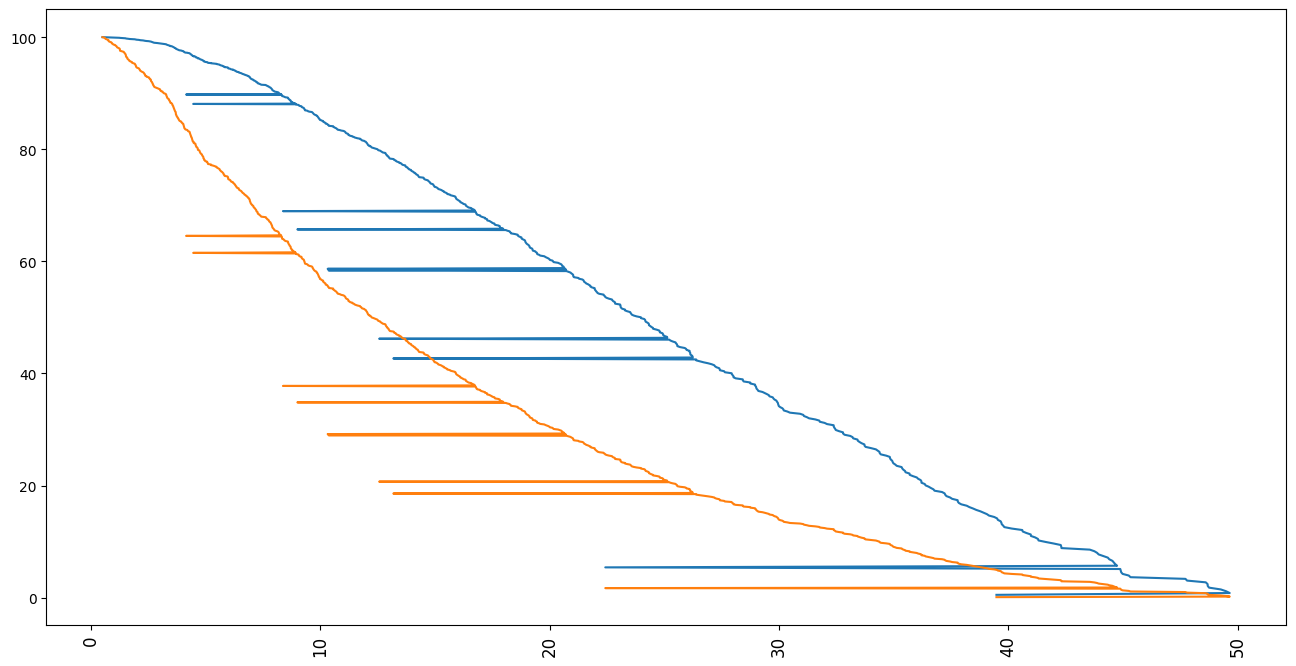

In [ ]:
f, ax = plt.subplots(figsize = (16,8))
ax.plot(df_ventas.index, df_ventas.Acum_Porc)
ax.plot(df_ventas.index, df_ventas.Posicion_Porc)
ax.tick_params(axis='x', labelsize=12, labelrotation=90)

In [ ]:
df.columns

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5_porcent', 'total',
       'date', 'time', 'payment', 'cogs', 'gross_margin_percentage',
       'gross_income', 'rating'],
      dtype='object')

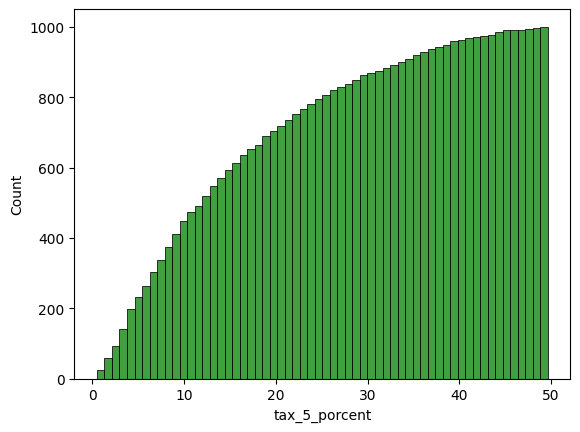

In [ ]:
sns.histplot(data = df, x = 'tax_5_porcent', bins = 60, color = 'green', cumulative = True);

# Regreesion lineal prediccion

In [ ]:
df['tax_5_porcent'].median()

12.088000000000001

In [ ]:
df.head(2)

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_porcent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


In [ ]:
#Adicion de paquetes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

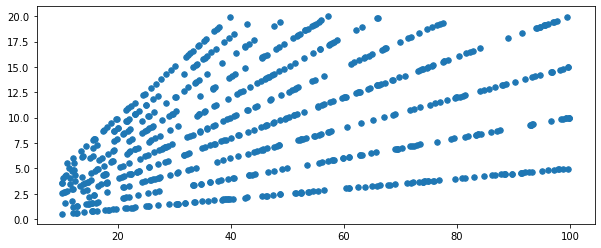

In [ ]:
# Vamos a conetrarnos en la zona donde se juntan más los puntos (Datos)
# esto es en el eje X: entre 0 y 300 dolares
# y en el eje Y: entre 0 y 20 de impuestos
filtered_data = df[(df['unit_price'] <= 300) & (df['tax_5_porcent'] <= 20)]
 
colores=['orange','blue']
tamanios=[30,60]
 
f1 = filtered_data['unit_price'].values
f2 = filtered_data['tax_5_porcent'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
'''asignar=[]
for index, row in filtered_data.iterrows():
    if(row['unit_price']>300):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])'''
    
plt.scatter(f1, f2, s=tamanios[0])
plt.show()

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["unit_price"]]
X_train = np.array(dataX)
y_train = filtered_data['tax_5_porcent'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.08314079]
Independent term: 
 4.976280206869415
Mean squared error: 23.21
Variance score: 0.16


In [ ]:
#Vamos a comprobar:
# Quiero predecir cuántas "ventas" voy a obtener por un producto de 300 dolares,
# según nuestro modelo, hacemos:
T300Dolares = regr.predict([[300]])
print(int(T300Dolares))
# REGRESION LINEAL

29


In [ ]:
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5_porcent,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [ ]:
#Adicion de paquetes
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Vamos a intentar mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (filtered_data["total"] + filtered_data['quantity'].fillna(0) + filtered_data['gross_income'])
 
dataX2 =  pd.DataFrame()
dataX2["unit_price"] = filtered_data["unit_price"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['total'].values

In [ ]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [0.07644696 0.93627372]
Mean squared error: 1.31
Variance score: 1.00


C:\Users\nicol\AppData\Local\Temp\ipykernel_25780\2587790845.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


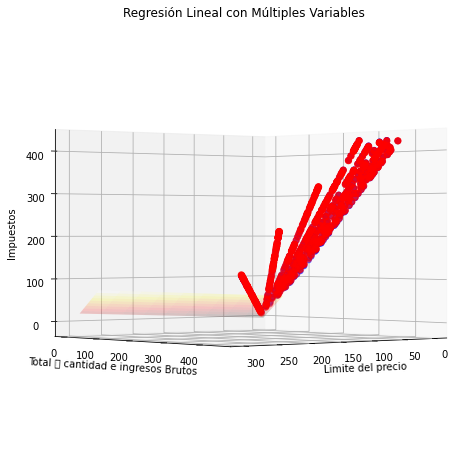

In [ ]:
fig = plt.figure(figsize = (20,6))
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 300, num=10), np.linspace(0, 60, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=00., azim=50
             )
        
ax.set_xlabel('Limite del precio');
ax.set_ylabel('Total ➕ cantidad e ingresos Brutos');
ax.set_zlabel('Impuestos');
ax.set_title('Regresión Lineal con Múltiples Variables');

In [ ]:

# Si quiero predecir cuántos "Ventas" voy a obtener con produuctos de X($300): 
# Total mas filtro de 300 dolares con una cantidad de 10 e ingresos brutos
# según nuestro modelo, hacemos:
 
tres = regr2.predict([[300, 10+4+0.1]])
print(int(tres))

32


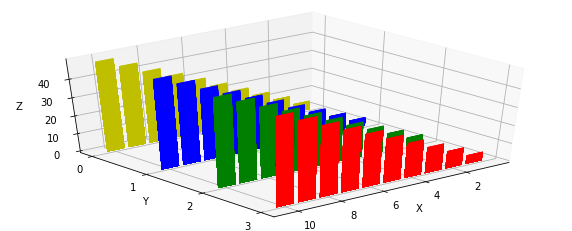

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(df)
    cs[0] = 'c'

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(df.quantity, df.gross_income, zs=k, zdir='y', color=cs, alpha=0.8)
    ax.view_init(elev=40., azim=50
             )

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# On the y axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

In [ ]:
iris = pd.read_csv("https://raw.githubusercontent.com/toneloy/data/master/iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
...,...,...,...,...,...
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     1000 non-null   datetime64[ns]
 1   invoice_id               1000 non-null   object        
 2   total                    1000 non-null   float64       
 3   unit_price               1000 non-null   float64       
 4   quantity                 1000 non-null   int64         
 5   tax_5_percent            1000 non-null   float64       
 6   tax_19_percent           1000 non-null   float64       
 7   cogs                     1000 non-null   float64       
 8   gross_income             1000 non-null   float64       
 9   rating                   1000 non-null   float64       
 10  city                     1000 non-null   object        
 11  gender                   1000 non-null   object        
 12  customer_type            1000 non-n